# Reporte de Análisis VIII

## Indentificando y Excluyendo Outliers

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (14, 6))

In [13]:
datos = pd.read_csv("Pandas/data/alquiler_residencial.csv", sep = ";")
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0


<Axes: >

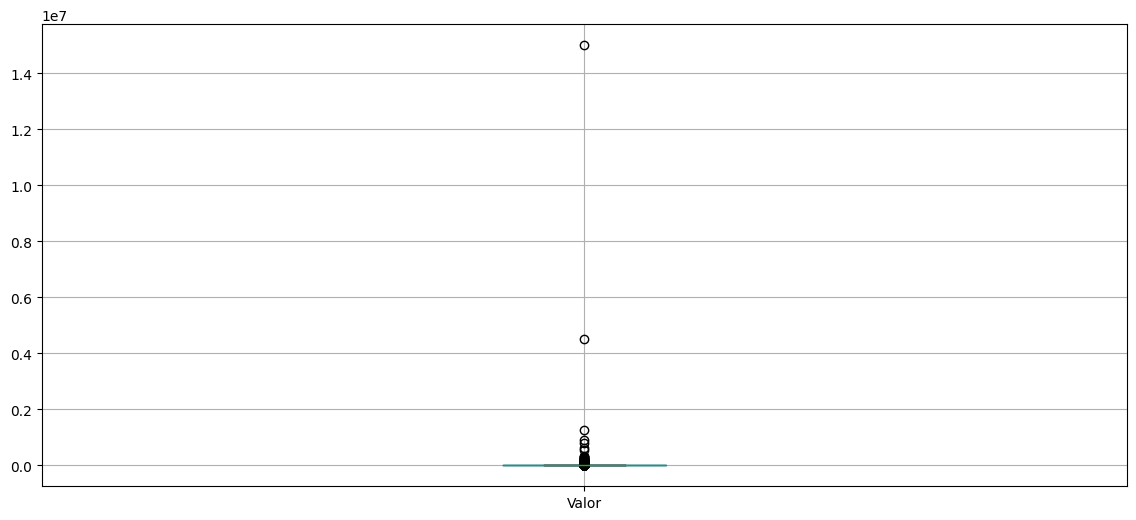

In [14]:
datos.boxplot(["Valor"])

In [15]:
datos[datos["Valor"] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
3141,Almacén,El Agustino,0,5,0,1100,15000000.0,0.0,1000.0
7946,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0
11077,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0
12135,Almacén,Pachacámac,0,83,0,34677,898134.0,0.0,0.0
13199,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0
14429,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0
16162,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0


In [16]:
valor = datos["Valor"]

In [17]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5*IIQ)
limite_superior = Q3 + (1.5*IIQ)

In [18]:
seleccion = ((valor >= limite_inferior) & (valor <= limite_superior))

In [19]:
datos_new = datos[seleccion]

<Axes: >

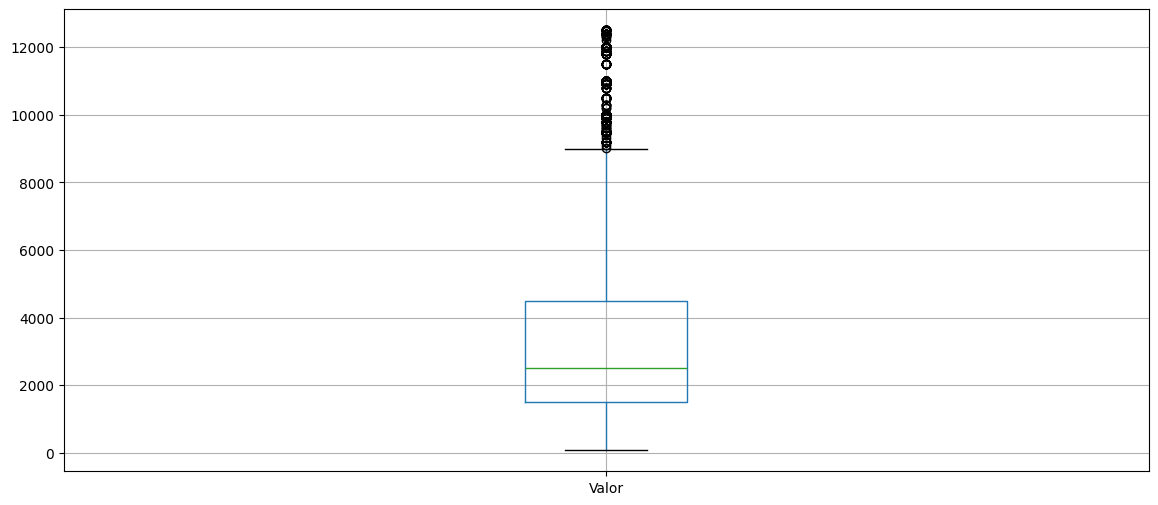

In [20]:
datos_new.boxplot(["Valor"])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

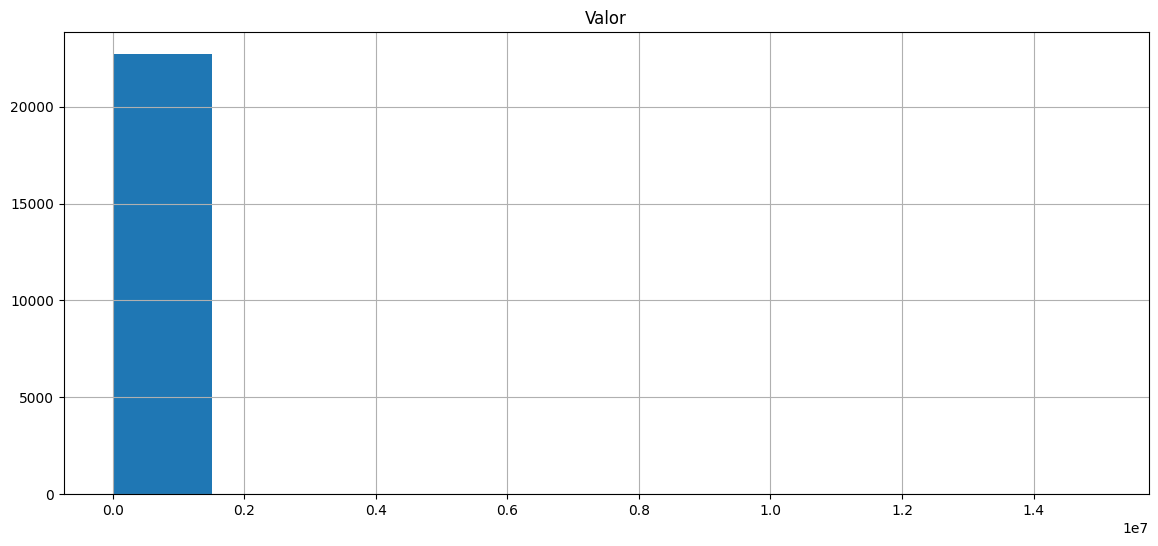

In [21]:
datos.hist(["Valor"])

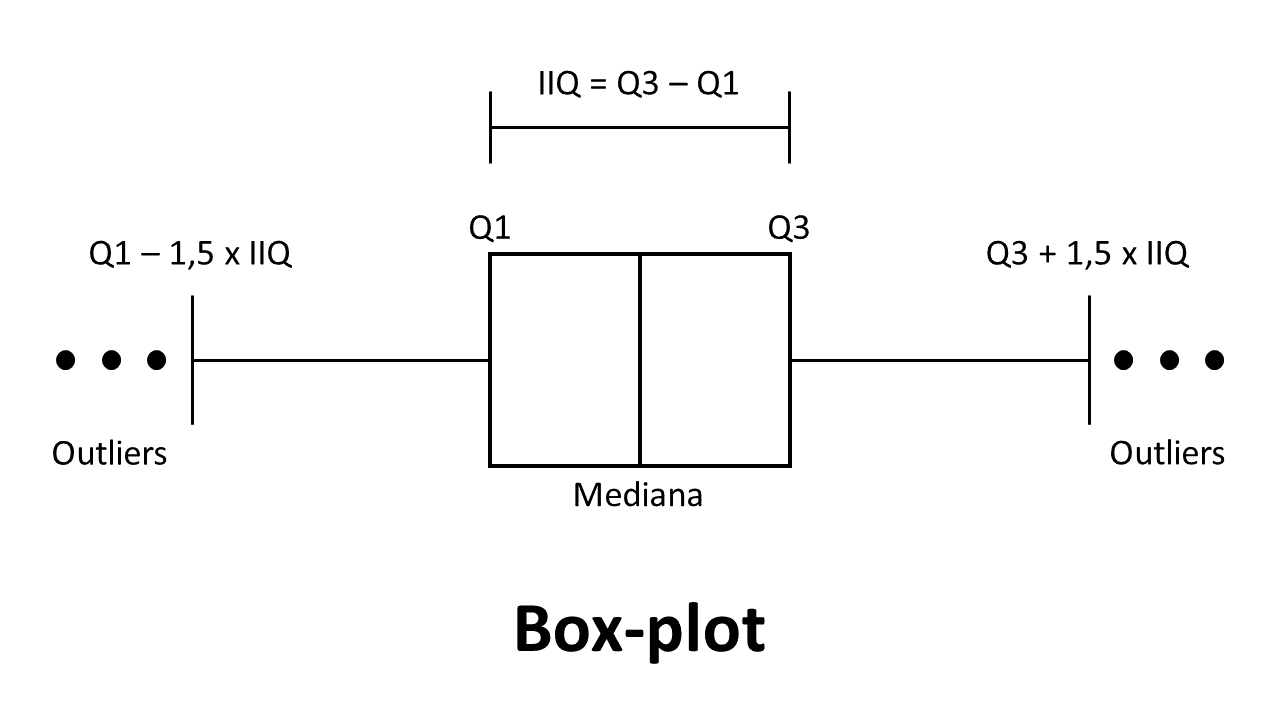

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

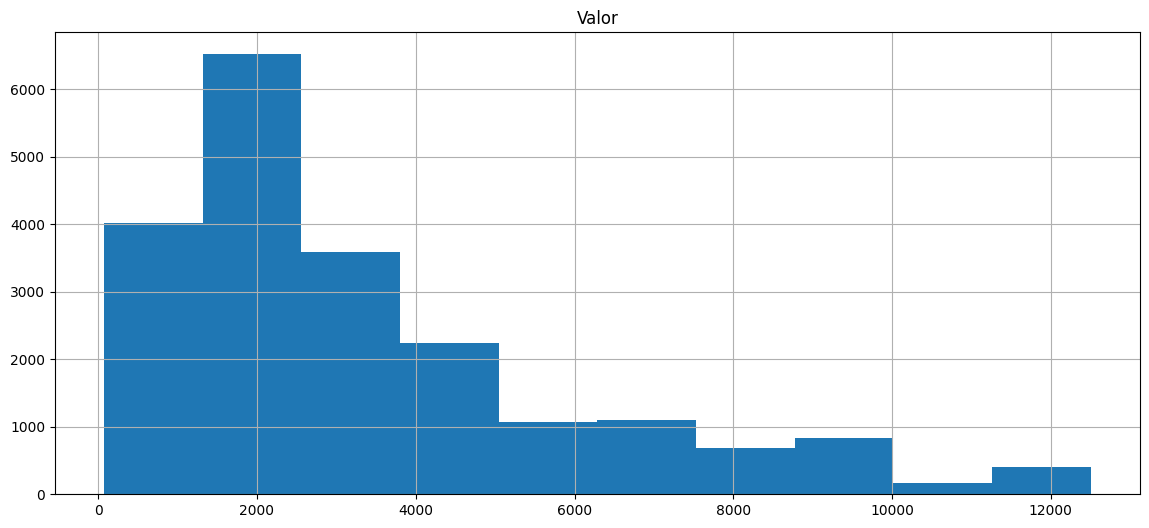

In [22]:
datos_new.hist(["Valor"])

### Identificando y Excluyendo Outliers(cintinuación)

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

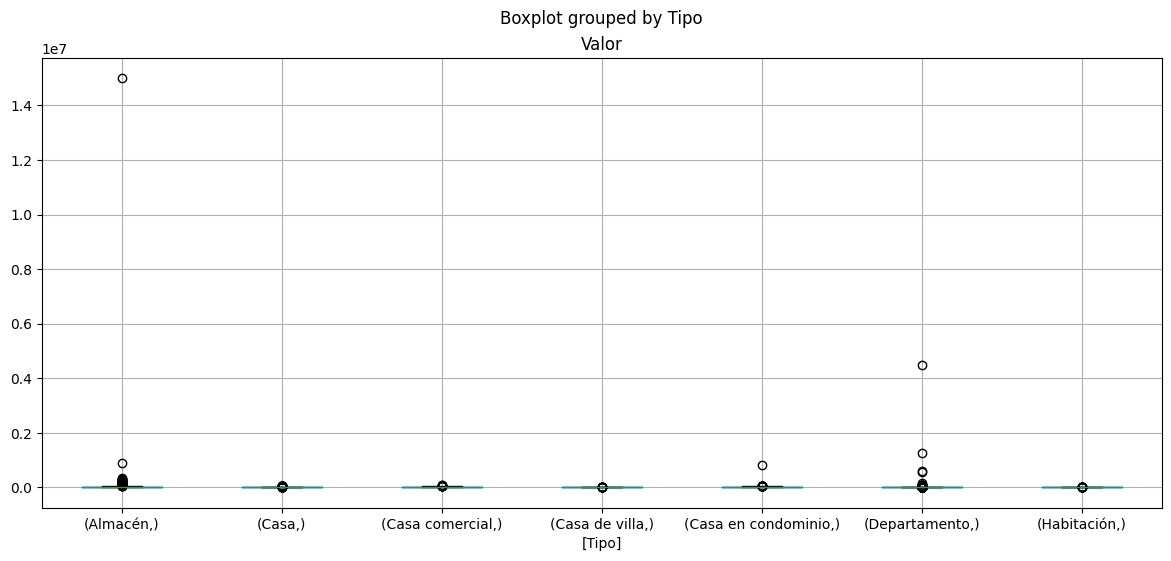

In [26]:
datos.boxplot(["Valor"], by=["Tipo"])

In [25]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0


In [30]:
grupo_tipo = datos.groupby("Tipo")["Valor"]

In [31]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [32]:
grupo_tipo.groups

{'Almacén': [57, 60, 87, 108, 224, 230, 244, 246, 294, 339, 369, 439, 483, 502, 504, 514, 587, 589, 614, 663, 669, 682, 764, 778, 785, 866, 964, 1005, 1015, 1062, 1161, 1180, 1182, 1194, 1198, 1209, 1231, 1272, 1344, 1365, 1382, 1401, 1403, 1431, 1478, 1511, 1590, 1608, 1619, 1715, 1742, 1879, 1906, 1941, 1948, 1973, 2017, 2036, 2094, 2099, 2140, 2142, 2145, 2157, 2325, 2326, 2343, 2375, 2379, 2384, 2388, 2437, 2494, 2495, 2577, 2589, 2636, 2638, 2672, 2724, 2740, 2745, 2772, 2926, 2938, 3013, 3014, 3049, 3055, 3101, 3131, 3137, 3141, 3152, 3168, 3172, 3286, 3312, 3317, 3405, ...], 'Casa': [1, 22, 54, 58, 100, 104, 150, 166, 186, 249, 261, 264, 275, 298, 322, 328, 348, 353, 372, 393, 400, 414, 440, 450, 492, 493, 499, 533, 564, 565, 592, 597, 598, 645, 649, 658, 664, 665, 692, 708, 732, 753, 756, 796, 807, 817, 895, 912, 980, 1028, 1076, 1083, 1167, 1172, 1174, 1211, 1233, 1306, 1313, 1376, 1396, 1413, 1435, 1479, 1493, 1497, 1508, 1514, 1541, 1544, 1557, 1660, 1678, 1731, 1737, 1741, 

In [33]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5*IIQ)
limite_superior = Q3 + (1.5*IIQ)

In [35]:
limite_inferior

Tipo
Almacén              -24125.0
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3250.0
Habitación                0.0
Name: Valor, dtype: float64

In [36]:
limite_superior

Tipo
Almacén               58875.0
Casa                  22850.0
Casa comercial        36000.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento           9950.0
Habitación             2400.0
Name: Valor, dtype: float64

In [37]:
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = datos['Tipo'] == tipo
    eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
    seleccion = eh_tipo & eh_dentro_limite
    datos_seleccion = datos[seleccion]
    datos_new = pd.concat([datos_new, datos_seleccion])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

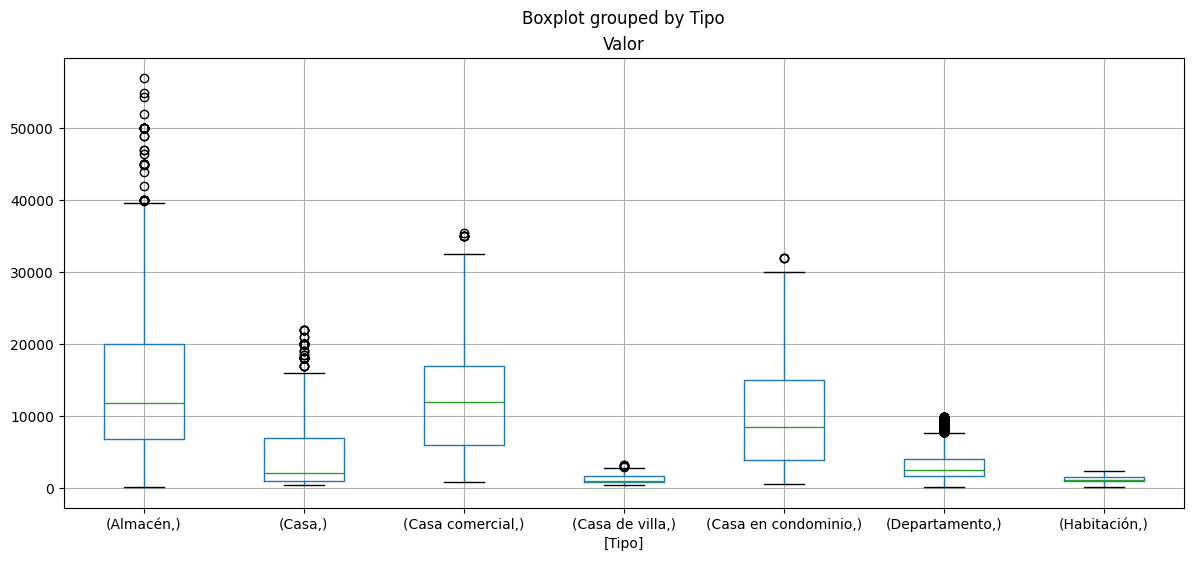

In [38]:
datos_new.boxplot(["Valor"], by = ["Tipo"])

In [39]:
datos_new.to_csv("Pandas/data/alquiler_residencial_sin_outliers.csv", sep = ";", index=False)